11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
index=6000, label=6
Saved image to: assignment1_output/train_image_6000.png


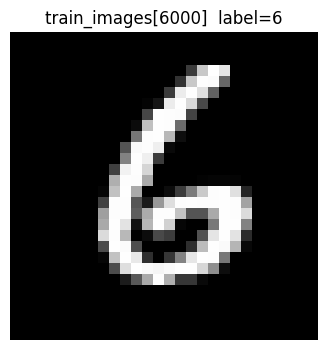

In [2]:
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import os

(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = keras.datasets.mnist.load_data()

print("train_images shape:", mnist_train_images.shape)
print("train_labels shape:", mnist_train_labels.shape)

idx = 6000
img = mnist_train_images[idx]
label = mnist_train_labels[idx]
print(f"index={idx}, label={label}")

plt.figure(figsize=(4,4))
plt.imshow(img, cmap='gray')
plt.title(f"train_images[{idx}]  label={label}")
plt.axis('off')

out_dir = "assignment1_output"
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, f"train_image_{idx}.png")
plt.savefig(out_path, bbox_inches='tight', pad_inches=0.1)
print("Saved image to:", out_path)

plt.show()

作业2图像已保存: assignment2_output/assignment2_subplot.png


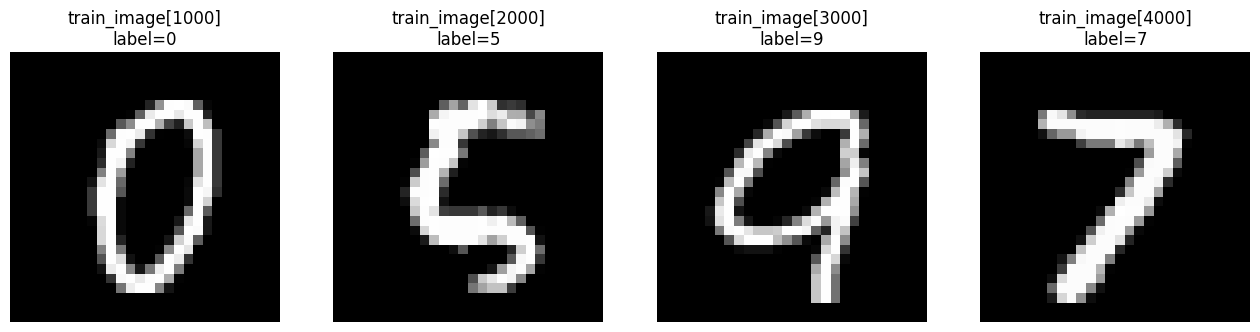

In [3]:
import matplotlib.pyplot as plt
from tensorflow import keras
import os

(train_images, train_labels), _ = keras.datasets.mnist.load_data()

indexes = [1000, 2000, 3000, 4000]

out_dir = "assignment2_output"
os.makedirs(out_dir, exist_ok=True)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

for i, idx in enumerate(indexes):
    ax = axes[i]
    img = train_images[idx]
    label = train_labels[idx]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"train_image[{idx}]\nlabel={label}")
    ax.axis("off")

save_path = os.path.join(out_dir, "assignment2_subplot.png")
plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
print("作业2图像已保存:", save_path)

plt.show()

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), _ = keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 784)).astype("float32") / 255.0

model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

print("\n===== MODEL SUMMARY =====\n")
model.summary()



===== MODEL SUMMARY =====



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 784)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 784)).astype("float32") / 255.0

model = keras.Sequential([
    keras.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\n===== MODEL SUMMARY (SGD Optimizer) =====\n")
model.summary()

print("\n===== MODEL COMPILED WITH SGD =====")
print(model.optimizer)



===== MODEL SUMMARY (SGD Optimizer) =====



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


===== MODEL COMPILED WITH SGD =====


In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 784)).astype("float32") / 255.0
test_images = test_images.reshape((10000, 784)).astype("float32") / 255.0

def create_model():
    model = keras.Sequential([
        keras.Input(shape=(784,)),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.01),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

model_2 = create_model()
history_2 = model_2.fit(train_images, train_labels, epochs=2, batch_size=32, verbose=1)
acc_2 = history_2.history["accuracy"][-1]

model_5 = create_model()
history_5 = model_5.fit(train_images, train_labels, epochs=5, batch_size=32, verbose=1)
acc_5 = history_5.history["accuracy"][-1]

print("\n===== RESULTS =====")
print(f"Accuracy (epochs=2): {acc_2:.4f}")
print(f"Accuracy (epochs=5): {acc_5:.4f}")


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7122 - loss: 1.0807
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9029 - loss: 0.3553
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7488 - loss: 1.0029
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9013 - loss: 0.3504
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9159 - loss: 0.2961
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9253 - loss: 0.2611
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9336 - loss: 0.2346

===== RESULTS =====
Accuracy (epochs=2): 0.9058
Accuracy (epochs=5): 0.9358
